<a href="https://colab.research.google.com/github/adarshagrawal38/ConsumerBehaviourPrediction/blob/master/ConsumerBehaviourPredictionNew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# In our data set we have customer age, gender and estimated salary based on that we will try to predict custome will buy our product or not
import pandas as pd
dataset = pd.read_csv('Customer_Behaviour.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [2]:
# remove userid
dataset = dataset.drop('User ID', axis=1)
dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


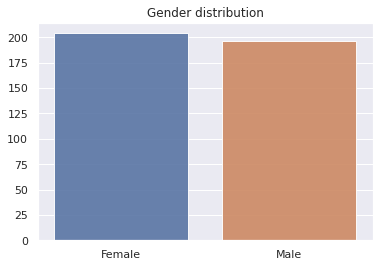

In [4]:
#gender visulization
import seaborn as sns
import matplotlib.pyplot as plt
cat_count = dataset['Gender'].value_counts()
sns.set(style='darkgrid')
sns.barplot(cat_count.index, cat_count.values, alpha=0.9)
plt.title('Gender distribution')
plt.show()

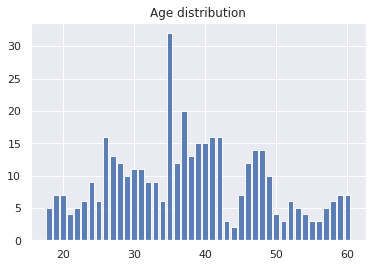

In [8]:
#Age visulization
import seaborn as sns
import matplotlib.pyplot as plt
cat_count = dataset['Age'].value_counts()
#sns.set(style='darkgrid')
plt.bar(cat_count.index, cat_count.values, alpha=0.9)
plt.title('Age distribution')
plt.show()

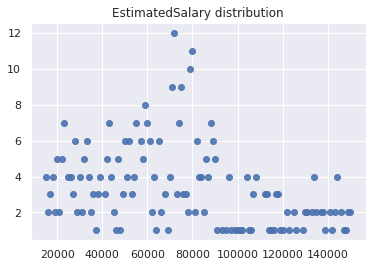

In [11]:
#EstimatedSalary visulization
import seaborn as sns
import matplotlib.pyplot as plt
cat_count = dataset['EstimatedSalary'].value_counts()
#sns.set(style='darkgrid')
plt.scatter(cat_count.index, cat_count.values, alpha=0.9)
plt.title('EstimatedSalary distribution')
plt.show()

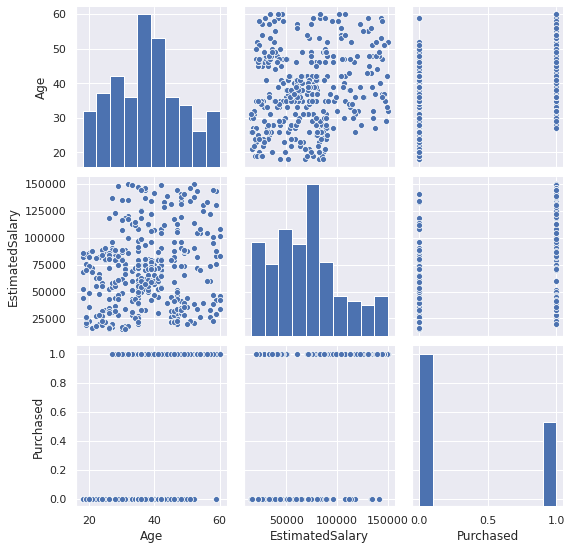

In [13]:
#Pair visulization
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)
g = sns.pairplot(dataset)

In [14]:
#one hot encoding on gender
dataset = pd.get_dummies(dataset, prefix='Gender')
dataset

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1
...,...,...,...,...,...
395,46,41000,1,1,0
396,51,23000,1,0,1
397,50,20000,1,1,0
398,36,33000,0,0,1


In [15]:
import numpy as np
from sklearn import preprocessing

float_array = dataset[['Age', 'EstimatedSalary','Gender_Female','Gender_Male', 'Purchased']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)
df_normalized = pd.DataFrame(scaled_array, columns=['Age', 'EstimatedSalary', 'Gender_Female','Gender_Male', 'Purchased'])
df_normalized

,Age,EstimatedSalary,Gender_Female,Gender_Male,Purchased
0,0.023810,0.029630,0.0,1.0,0.0
1,0.404762,0.037037,0.0,1.0,0.0
2,0.190476,0.207407,1.0,0.0,0.0
3,0.214286,0.311111,1.0,0.0,0.0
4,0.023810,0.451852,0.0,1.0,0.0
...,...,...,...,...,...
395,0.666667,0.192593,1.0,0.0,1.0
396,0.785714,0.059259,0.0,1.0,1.0
397,0.761905,0.037037,1.0,0.0,1.0
398,0.428571,0.133333,0.0,1.0,0.0


In [16]:
#deviding dataset into training and testing part
from sklearn.model_selection import train_test_split
x = df_normalized.drop('Purchased', axis=1)
print(x)
y =df_normalized['Purchased']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
x_train

          Age  EstimatedSalary  Gender_Female  Gender_Male
0    0.023810         0.029630            0.0          1.0
1    0.404762         0.037037            0.0          1.0
2    0.190476         0.207407            1.0          0.0
3    0.214286         0.311111            1.0          0.0
4    0.023810         0.451852            0.0          1.0
..        ...              ...            ...          ...
395  0.666667         0.192593            1.0          0.0
396  0.785714         0.059259            0.0          1.0
397  0.761905         0.037037            1.0          0.0
398  0.428571         0.133333            0.0          1.0
399  0.738095         0.155556            1.0          0.0

[400 rows x 4 columns]


,Age,EstimatedSalary,Gender_Female,Gender_Male
130,0.309524,0.318519,0.0,1.0
51,0.000000,0.214815,1.0,0.0
213,0.404762,0.318519,0.0,1.0
38,0.190476,0.422222,1.0,0.0
182,0.333333,0.755556,1.0,0.0
...,...,...,...,...
172,0.190476,0.762963,1.0,0.0
72,0.047619,0.059259,1.0,0.0
179,0.309524,0.140741,1.0,0.0
82,0.047619,0.251852,0.0,1.0


In [18]:
#Applying naive bayes algorithm
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
classifier = GaussianNB()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

acc = accuracy_score(y_test, y_pred)
print('Accuracy of GaussianNB is: ',acc)

Accuracy of GaussianNB is:  0.9125


Accuracy :  0.9


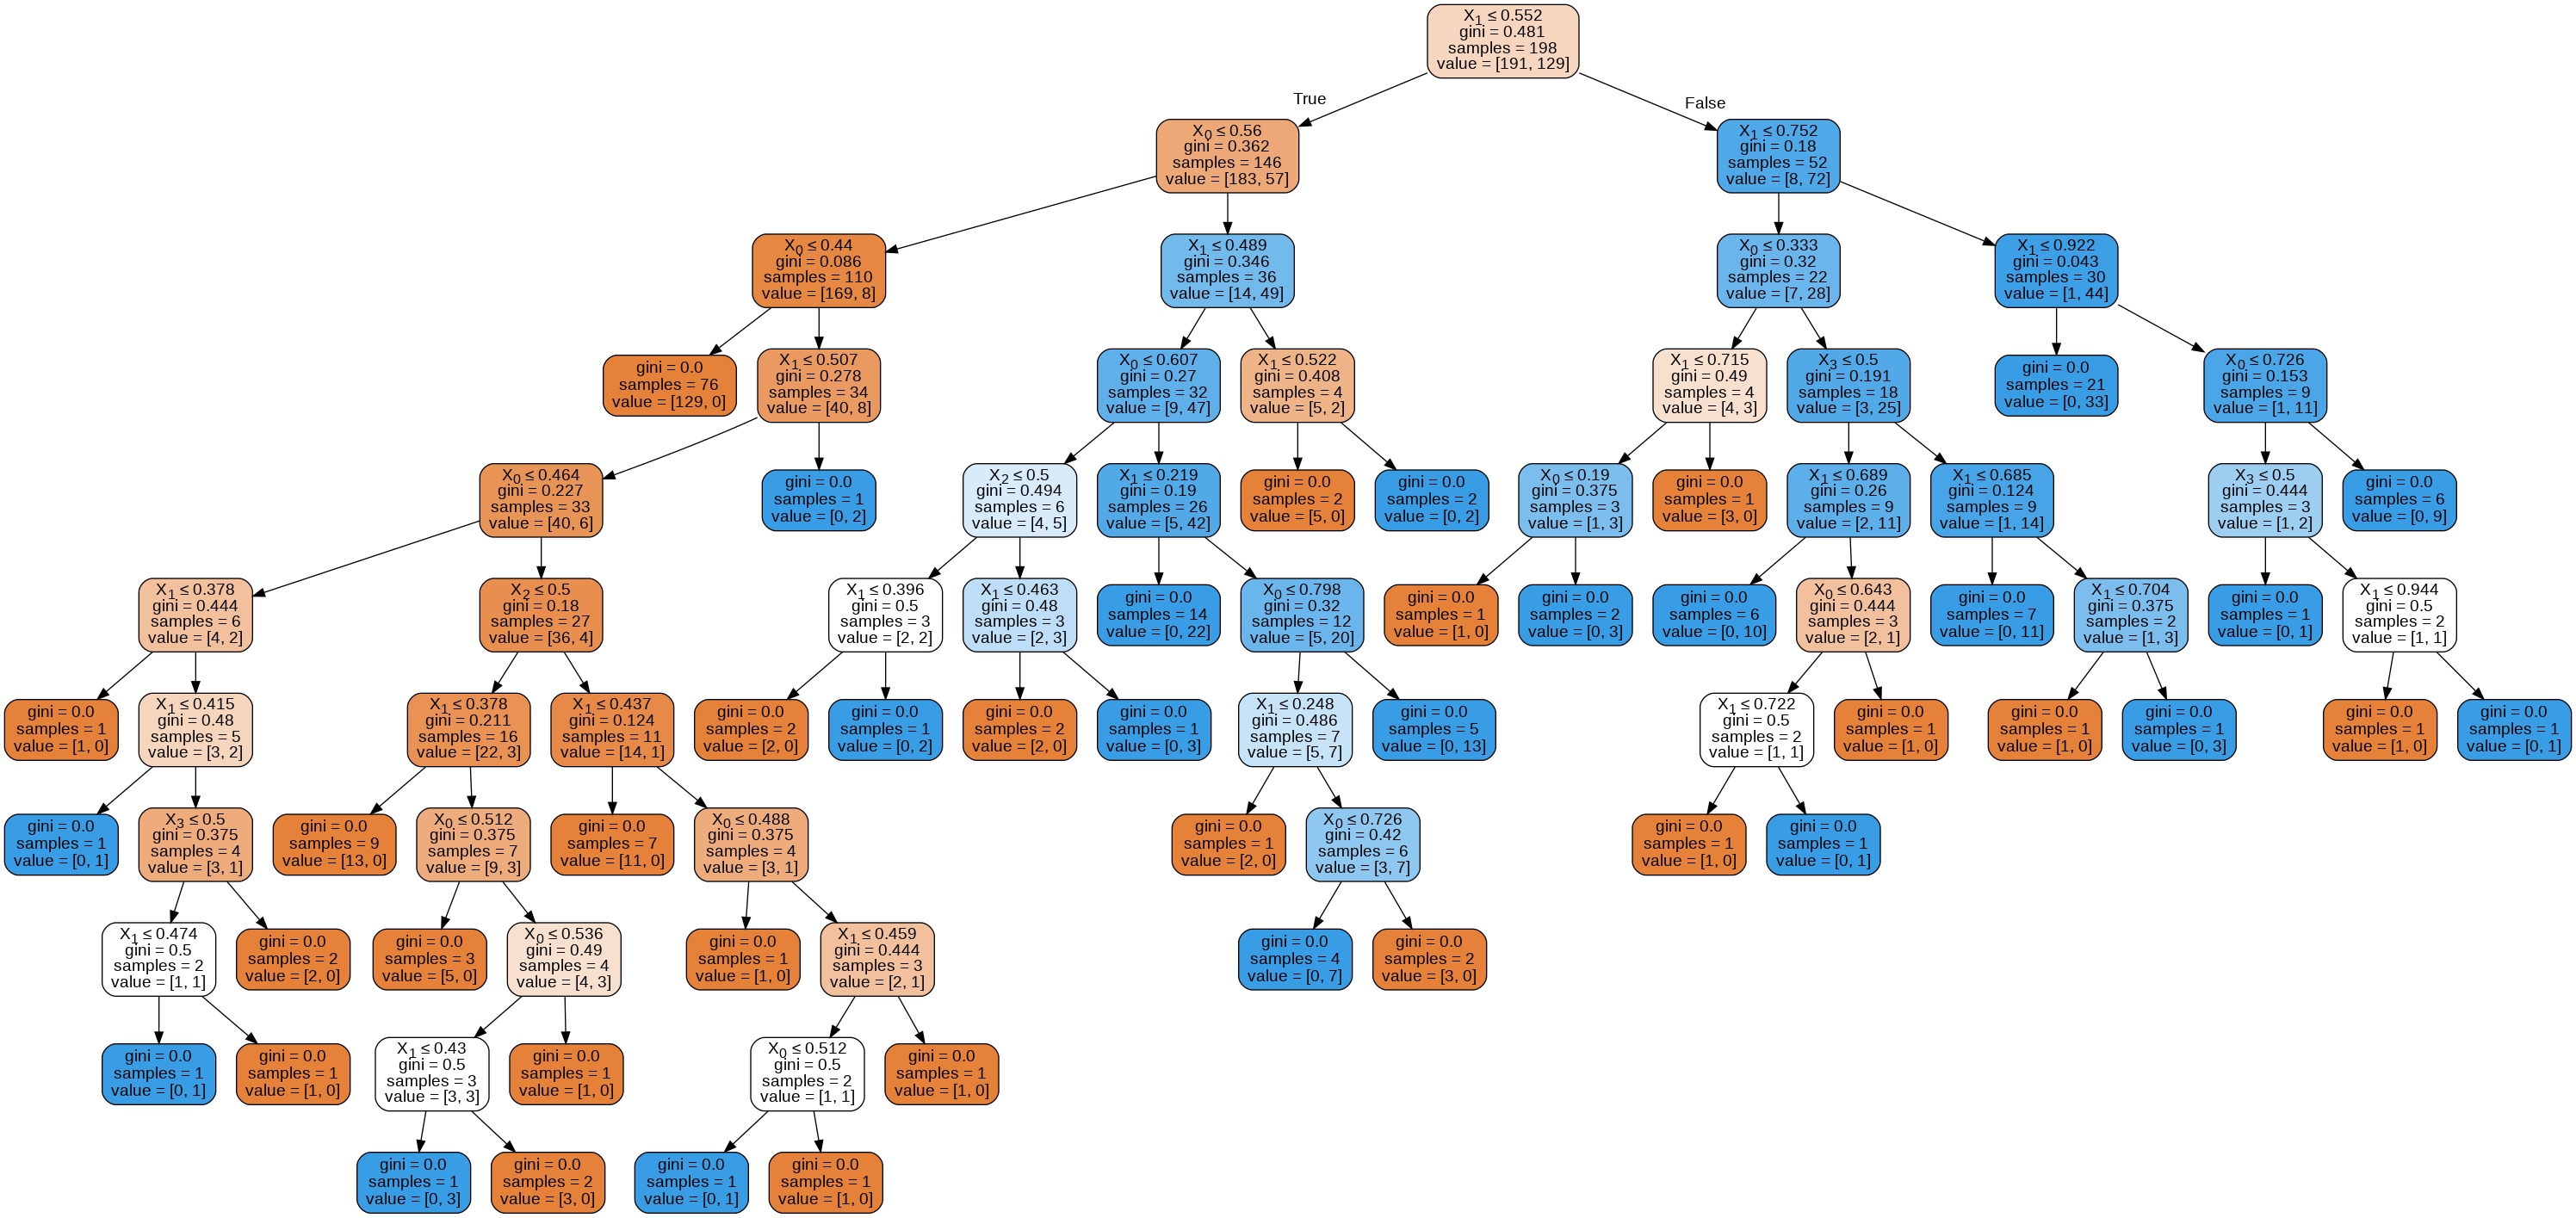

In [28]:
#Applying radom forest algo
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


model_rf = RandomForestClassifier(n_estimators=300, oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 50)
model_rf.fit(x_train, y_train)

# Make predictions
prediction_test = model_rf.predict(x_test)
print ("Accuracy : ",metrics.accuracy_score(y_test, prediction_test))
# Import tools needed for visualization
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  

from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(model_rf.estimators_[1], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), width=1300, height=800)

In [0]:
#Applying SVM
from sklearn import svm
from sklearn import metrics
classifier_svm = svm.SVC()
classifier_svm.fit(x_train, y_train)

y_pred = classifier_svm.predict(x_test)


print ("SVM Accuracy : ",metrics.accuracy_score(y_test, y_pred))

SVM Accuracy :  0.9


Decision tree accuracy:  0.8375


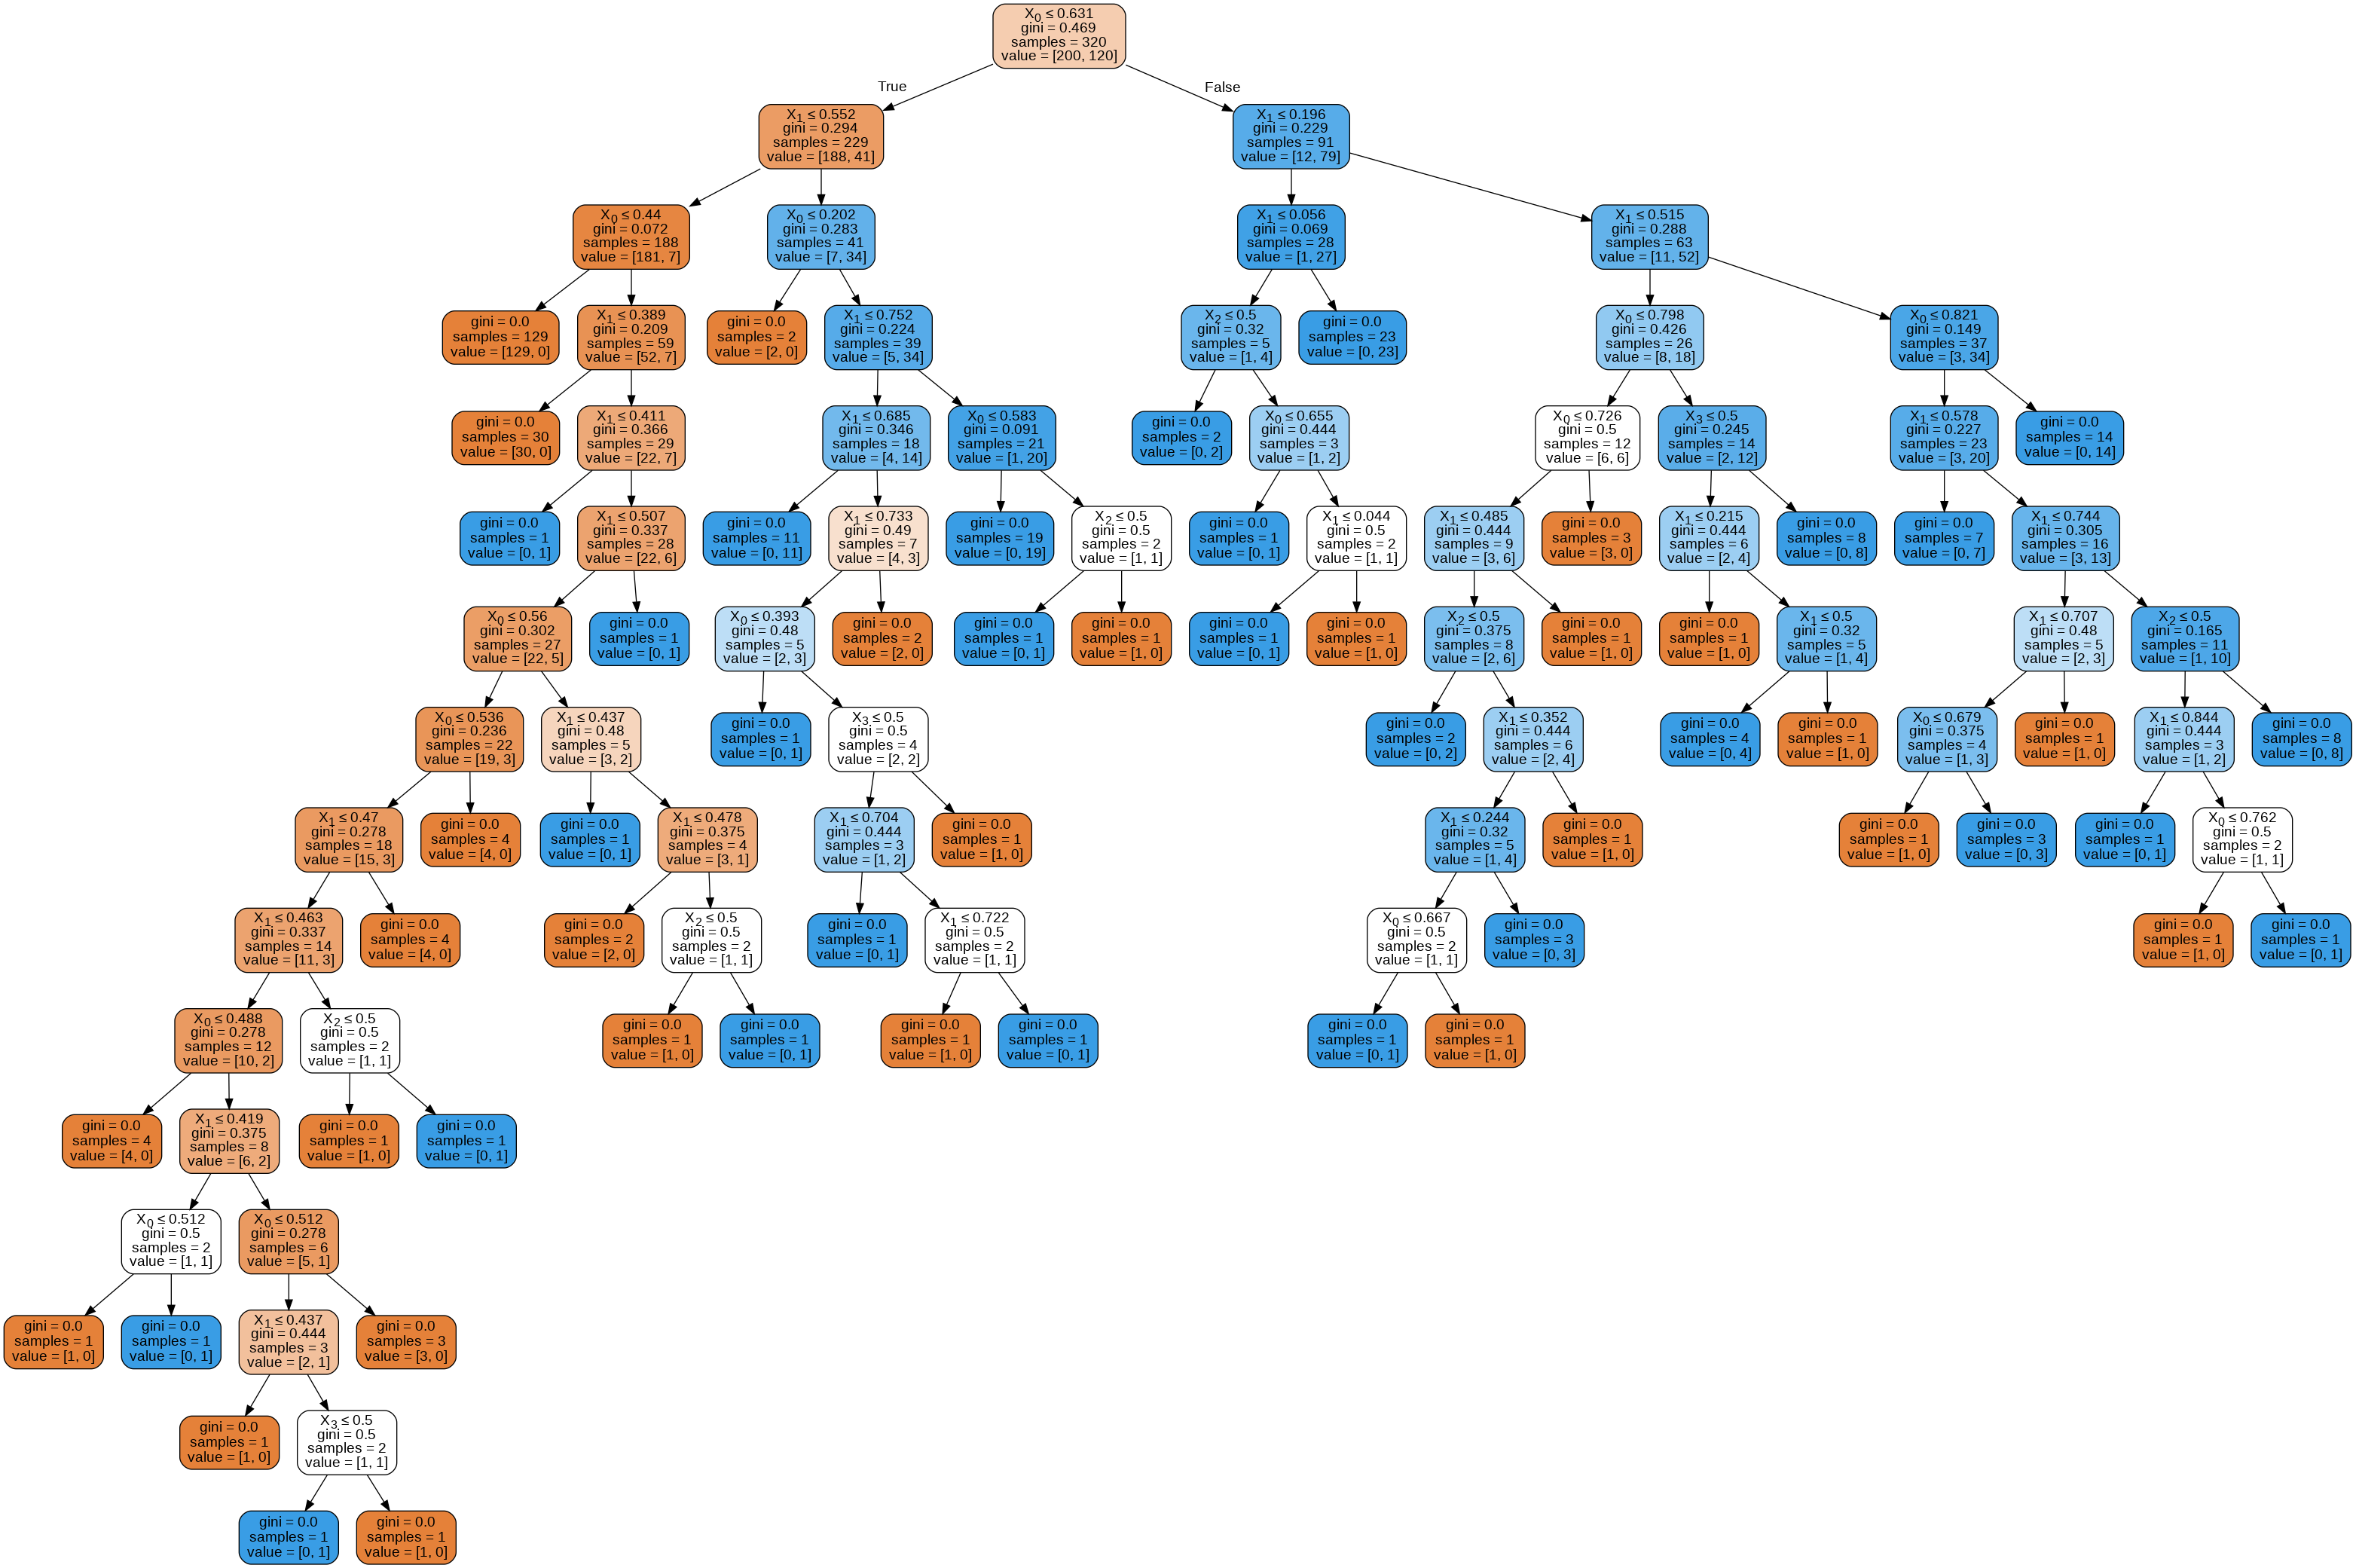

In [29]:
#Applying decision tree
from sklearn import tree
from sklearn import metrics
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
print('Decision tree accuracy: ', metrics.accuracy_score(y_test, y_pred))

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  

from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), width=1300, height=800)

# New Section

In [0]:
#Applying logistics regression
from sklearn.linear_model import LogisticRegression

lf = LogisticRegression(random_state=0).fit(x_train, y_train)
y_ped = clf.predict(x_test)
print('Logistic Regression accuracy: ', metrics.accuracy_score(y_test, y_ped))

0.996875
Logistic Regression accuracy:  0.9


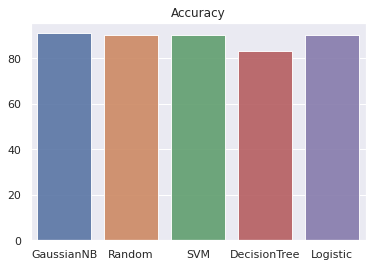

In [32]:
#Accuracy visulization
algo = ['GaussianNB', 'Random', 'SVM', 'DecisionTree', 'Logistic']
accuracy = [91, 90, 90, 83, 90]

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')
sns.barplot(algo, accuracy, alpha=0.9)
plt.title('Accuracy')
plt.show()
